In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
california = fetch_california_housing()

In [16]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(
    california.target, name='MedHouseValue'
)

In [17]:
df = pd.concat([X,y],axis=1
)

In [18]:
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseValue  
0        -122.23          4.526  
1        -122.22          3.585  
2        -122.24          3.521  
3        -122.25          3.413  
4        -122.25          3.422  
...          ...            ...  
20635    -121.09          0.781  
20636    -121.21          0.771  
20637    -121.22          0.923  
20638    -121.32          0.847  
20639    -121.24          0.894  

[20640 rows x 9 columns]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [20]:
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1 
)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [21]:
print("Model Evaluation:")
print(f"  Mean Absolute Error (MAE): ${mean_absolute_error(y_test, y_pred) * 100000:.2f}")
print(f"  Mean Squared Error (MSE): ${mean_squared_error(y_test, y_pred) * (100000**2):.2f}")
print(f"  R² Score: {r2_score(y_test, y_pred):.4f}")

Model Evaluation:
  Mean Absolute Error (MAE): $36628.90
  Mean Squared Error (MSE): $2964927833.63
  R² Score: 0.7737


In [22]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred_lin = lin.predict(X_test)

print(f"Linear Regression R²: {r2_score(y_test, y_pred_lin):.4f}")


Linear Regression R²: 0.5758


In [23]:
model_v2 = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

In [24]:
model_v2.fit(X_train,y_train)
y_pred_v2 = model_v2.predict(X_test)

In [25]:
print(f"Tuned model r2:{r2_score(y_test,y_pred_v2):.3f}")

Tuned model r2:0.798


# Feature engineering

In [26]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')

In [27]:
df['Rooms_per_house'] = df['AveRooms']/df['AveOccup']

In [28]:
df['BedroomRatio'] = df['AveBedrms']/df['AveRooms']
df['PopulationPerHouse'] = df['Population']/df['AveOccup']

In [29]:
coast_lon = -118.0
df['DistToCoast'] = abs(df['Longitude'] - coast_lon)

In [30]:
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseValue  Rooms_per_house  BedroomRatio  \
0        -122.23          4.526         2.732919      0.146591   
1        -122.22          3.585         2.956685      0.155797   
2        -122.24          3.521         2.957661      0.129516   
3        -122.25          3.413         2.283154      0.184458   
4        -122.25          3.422         2.879646      0.172096   
...          ...            ...              ...           ...   
20635    -121.09          0.781         1.970414      0.224625   
20636    -121.21          0.771         1.957865      0.215208   
20637    -121.22          0.923         2.238332      0.215173   
20638    -121.32          0.847         2.510121      0.219892   
20639    -121.24          0.894         2.007931      0.221185   

       PopulationPerHouse  DistToCoast  
0                   126.0         4.23  
1                  1138.0         4.22  
2                   177.0         4.24  
3                   219.0         4.25  
4                   259.0         4.25  
...                   ...          ...  
20635               330.0         3.09  
20636               114.0         3.21  
20637               433.0         3.22  
20638               349.0         3.32  
20639               530.0         3.24  

[20640 rows x 13 columns]

In [31]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue', 'Rooms_per_house',
       'BedroomRatio', 'PopulationPerHouse', 'DistToCoast'],
      dtype='object')

In [32]:
X = df.drop('MedHouseValue',axis=1)
y =df['MedHouseValue']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y, test_size=0.2,random_state=42
)

In [34]:
model_with_feat = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
model_with_feat.fit(X_train,y_train)
y_pred_with_feat = model_with_feat.predict(X_test)


In [35]:
print(f"Model with new features r2:{r2_score(y_test,y_pred_with_feat):.3f}")
print(f"Model with new feat, MAE:{mean_absolute_error(y_test,y_pred_with_feat):.2f}")
print(f"  Mean Squared Error (MSE):{mean_squared_error(y_test, y_pred):.2f}")

Model with new features r2:0.774
Model with new feat, MAE:0.37
  Mean Squared Error (MSE):0.30


In [36]:
importances = model_with_feat.feature_importances_
feature_names = X_train.columns

feature_importance_df =  pd.DataFrame({
    'Feature':feature_names,
    'importance':importances
}).sort_values(by='importance', ascending=False)
print(feature_importance_df)


               Feature  importance
0               MedInc    0.604883
5             AveOccup    0.133358
6             Latitude    0.063044
1             HouseAge    0.046184
7            Longitude    0.043507
11         DistToCoast    0.038546
9         BedroomRatio    0.017571
2             AveRooms    0.015124
8      Rooms_per_house    0.012752
3            AveBedrms    0.009794
10  PopulationPerHouse    0.008600
4           Population    0.006636


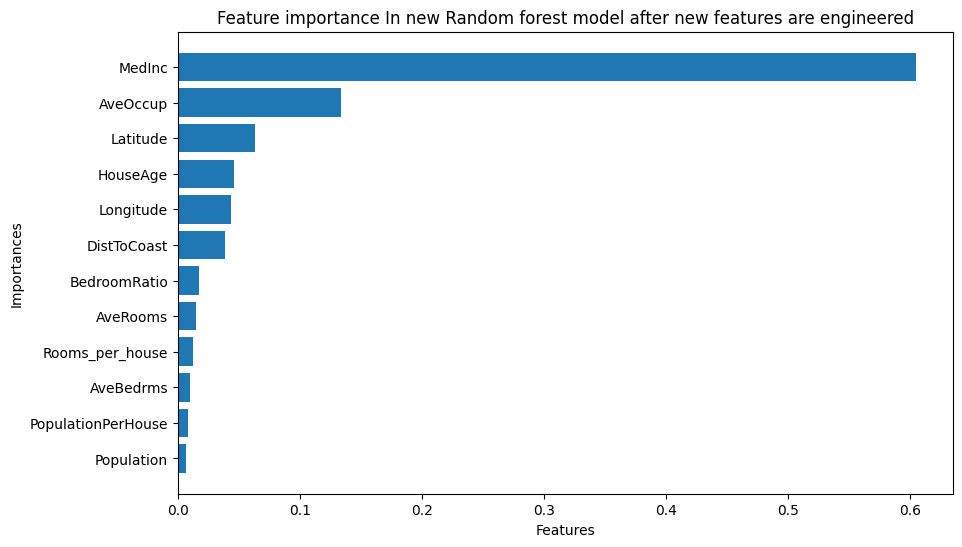

In [37]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'],feature_importance_df['importance'])
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('Feature importance In new Random forest model after new features are engineered')
plt.gca().invert_yaxis() # most important/highest feature on top. agar yeh use ni kara toh ascending order mei ata
plt.show()


In [38]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  Rooms_per_house  BedroomRatio  \
0    -122.23          4.526         2.732919      0.146591   
1    -122.22          3.585         2.956685      0.155797   
2    -122.24          3.521         2.957661      0.129516   
3    -122.25          3.413         2.283154      0.184458   
4    -122.25          3.422         2.879646      0.172096   

   PopulationPerHouse  DistToCoast  
0               126.0         4.23  
1              1138.0         4.22  
2               177.0         4.24  
3               219.0         4.25  
4               259.0         4.25

In [39]:
feature_importance_df

Feature  importance
0               MedInc    0.604883
5             AveOccup    0.133358
6             Latitude    0.063044
1             HouseAge    0.046184
7            Longitude    0.043507
11         DistToCoast    0.038546
9         BedroomRatio    0.017571
2             AveRooms    0.015124
8      Rooms_per_house    0.012752
3            AveBedrms    0.009794
10  PopulationPerHouse    0.008600
4           Population    0.006636

# Adding new feature and retraining model

In [40]:
df['IncomePerOccupant'] = df['MedInc']/df['AveOccup']

df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue', 'Rooms_per_house',
       'BedroomRatio', 'PopulationPerHouse', 'DistToCoast',
       'IncomePerOccupant'],
      dtype='object')

In [41]:
X = df.drop('MedHouseValue',axis=1)
y = df['MedHouseValue']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [43]:
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [44]:
MAE = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE:",MAE)
print("R2 score:",r2)

MAE: 0.34401895548158634
R2 score: 0.7962562354182231


In [45]:
importances_new = model.feature_importances_
feature_names_new = X_train.columns
feature_importance_df_new =  pd.DataFrame({
    'Feature':feature_names_new,
    'importance':importances_new
}).sort_values(by='importance', ascending=False)
feature_importance_df_new

Feature  importance
12   IncomePerOccupant    0.680750
6             Latitude    0.073786
7            Longitude    0.050306
11         DistToCoast    0.050285
1             HouseAge    0.029129
0               MedInc    0.026929
5             AveOccup    0.017628
8      Rooms_per_house    0.015212
9         BedroomRatio    0.013460
2             AveRooms    0.011882
3            AveBedrms    0.011596
4           Population    0.011246
10  PopulationPerHouse    0.007792

# Error Analysis

In [46]:
import numpy as np
residuals = y_test - y_pred
error_df = pd.DataFrame({
    'Actual_price':y_test.values,   
    'Predicted_price':y_pred,})
error_df['Residual'] = error_df['Actual_price'] - error_df['Predicted_price']
error_df['Abs_error'] =np.abs( error_df['Residual'])

In [47]:
top_10_errors = error_df.sort_values('Abs_error',ascending=False).head(10)

# Big error So Log Transformation

In [48]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
model_log = RandomForestRegressor()
model_log.fit(X_train,y_train_log)
y_pred_dollars_old = model.predict(X_test)  
y_pred_log = model_log.predict(X_test)      
y_pred_dollars_new = np.expm1(y_pred_log)        

In [49]:
print("r2 score:",r2_score(y_test_log,y_pred_log))
print('MAE_log:',mean_absolute_error(y_test_log,y_pred_log))
print('MAE ($):', mean_absolute_error(y_test,y_pred_dollars_new))
print('RMSE ($):', np.sqrt(mean_absolute_error(y_test,y_pred_dollars_new)))

r2 score: 0.8443866477001097
MAE_log: 0.09588487047382499
MAE ($): 0.30512432233258074
RMSE ($): 0.552380595543128


In [50]:
error_df = pd.DataFrame({
    'Actual_Price':y_test.values,
    'Predicted_Price':y_pred_dollars_new
})
error_df['Residual'] = error_df['Actual_Price'] - error_df['Predicted_Price']
error_df['Abs_Error'] = np.abs(error_df['Residual'])

In [51]:
print(error_df)

      Actual_Price  Predicted_Price  Residual  Abs_Error
0          0.47700         0.471729  0.005271   0.005271
1          0.45800         0.695196 -0.237196   0.237196
2          5.00001         4.256283  0.743727   0.743727
3          2.18600         2.442146 -0.256146   0.256146
4          2.78000         2.661598  0.118402   0.118402
...            ...              ...       ...        ...
4123       2.63300         2.275767  0.357233   0.357233
4124       2.66800         2.098580  0.569420   0.569420
4125       5.00001         4.755890  0.244120   0.244120
4126       0.72300         0.701676  0.021324   0.021324
4127       1.51500         1.693331 -0.178331   0.178331

[4128 rows x 4 columns]


In [52]:
print(error_df.sort_values('Abs_Error',ascending=False).head(10))

      Actual_Price  Predicted_Price  Residual  Abs_Error
872        5.00001         1.532540  3.467470   3.467470
1649       5.00001         1.805422  3.194588   3.194588
3693       5.00001         2.067457  2.932553   2.932553
1865       5.00001         2.136190  2.863820   2.863820
3710       4.50000         1.767084  2.732916   2.732916
1838       1.69300         4.330889 -2.637889   2.637889
1102       2.13900         4.760781 -2.621781   2.621781
2250       5.00001         2.396523  2.603487   2.603487
1140       5.00001         2.398719  2.601291   2.601291
2927       0.17500         2.725650 -2.550650   2.550650


In [53]:
residuals_dollars_new = y_test - y_pred_dollars_new
abs_errors_dollars = np.abs(residuals_dollars_new)


In [54]:
top_10_worst_indices = np.argsort(abs_errors_dollars)[-10:][::-1]


In [55]:
print("TOP 10 WORST PREDICTIONS (New Log-Transformed Model)")
print("="*80)
for i, idx in enumerate(top_10_worst_indices, 1):
    actual = y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]
    predicted = y_pred_dollars_new[idx]
    error = actual - predicted
    error_pct = (abs(error) / actual) * 100
    
    print(f"{i}. Actual: ${actual*100000:,.0f} | Predicted: ${predicted*100000:,.0f}")
    print(f"   Error: ${error*100000:,.0f} ({error_pct:.1f}%)")
    print(f"   Underpredicted? {error > 0} | Overpredicted? {error < 0}")
    print("-" * 40)

TOP 10 WORST PREDICTIONS (New Log-Transformed Model)
1. Actual: $500,001 | Predicted: $153,254
   Error: $346,747 (69.3%)
   Underpredicted? True | Overpredicted? False
----------------------------------------
2. Actual: $500,001 | Predicted: $180,542
   Error: $319,459 (63.9%)
   Underpredicted? True | Overpredicted? False
----------------------------------------
3. Actual: $500,001 | Predicted: $206,746
   Error: $293,255 (58.7%)
   Underpredicted? True | Overpredicted? False
----------------------------------------
4. Actual: $500,001 | Predicted: $213,619
   Error: $286,382 (57.3%)
   Underpredicted? True | Overpredicted? False
----------------------------------------
5. Actual: $450,000 | Predicted: $176,708
   Error: $273,292 (60.7%)
   Underpredicted? True | Overpredicted? False
----------------------------------------
6. Actual: $169,300 | Predicted: $433,089
   Error: $-263,789 (155.8%)
   Underpredicted? False | Overpredicted? True
----------------------------------------
7. 

In [56]:
import joblib
joblib.dump(model_log,'california_housing_model.pkl')
print('Model saved')

Model saved


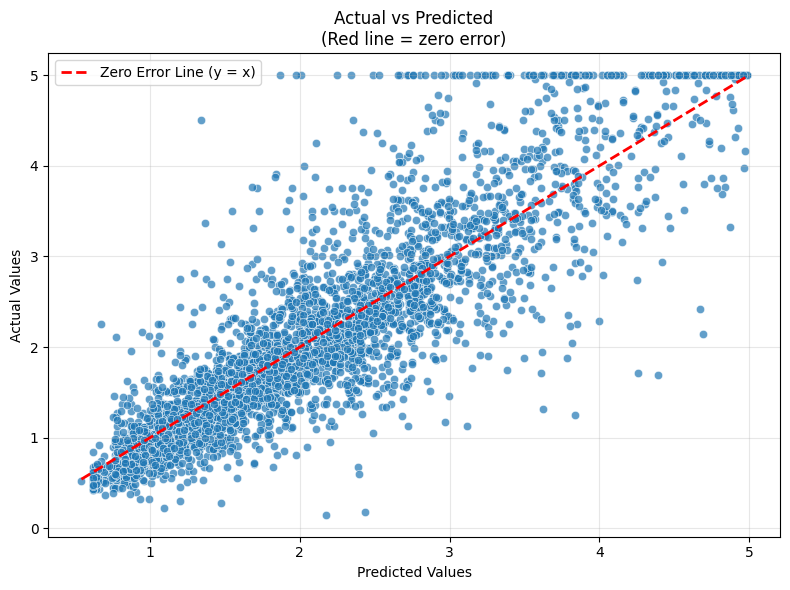

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 
         'r--', lw=2, label='Zero Error Line (y = x)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted\n(Red line = zero error)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

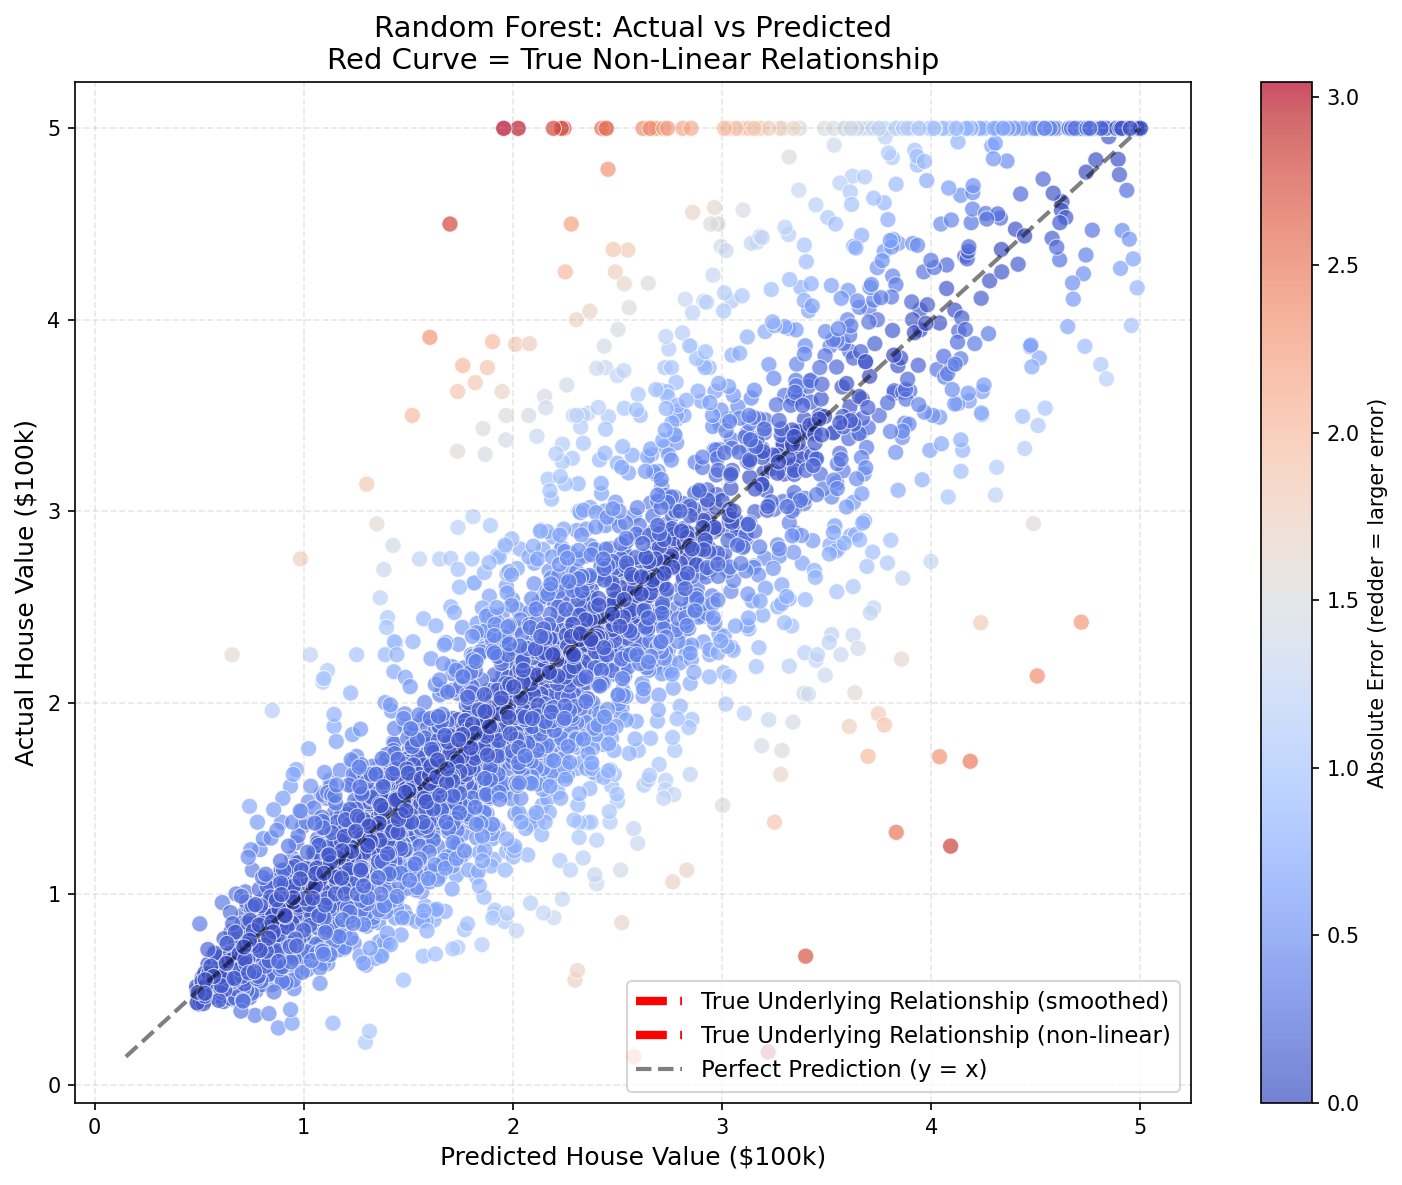

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_for_pic= pd.DataFrame(housing.data, columns=housing.feature_names)
y_for_pic = housing.target

X_train_for_pic, X_test_for_pic, y_train_for_pic, y_test_for_pic = train_test_split(X_for_pic, y_for_pic, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_for_pic, y_train_for_pic)
y_pred_for_pic= rf.predict(X_test_for_pic)

plt.figure(figsize=(10, 8), dpi=150)  

errors_for_pic = np.abs(y_test_for_pic - y_pred_for_pic)
plt.scatter(y_pred_for_pic, y_test_for_pic, c=errors_for_pic, cmap='coolwarm', alpha=0.7, 
            edgecolors='white', linewidth=0.5, s=60)
# Sort for smooth curve (approximating the true non-linear relationship)
sort_idx = np.argsort(y_pred_for_pic)
y_pred_sorted = y_pred_for_pic[sort_idx]
y_test_sorted = y_test_for_pic[sort_idx]

from scipy.interpolate import make_interp_spline

x_sorted = y_pred_for_pic[sort_idx]
y_sorted = y_test_for_pic[sort_idx]
from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(x_sorted, y_sorted, s=0.5, k=3)
x_smooth = np.linspace(x_sorted.min(), x_sorted.max(), 400)
y_smooth = spl(x_smooth)
plt.plot(x_smooth, y_smooth, color='red', lw=4, linestyle='--', 
         label='True Underlying Relationship (smoothed)')
x_smooth = np.linspace(y_pred_sorted.min(), y_pred_sorted.max(), 300)
y_smooth = spl(x_smooth)
plt.plot(x_smooth, y_smooth, color='red', linewidth=4, linestyle='--', 
         label='True Underlying Relationship (non-linear)')
plt.plot([y_for_pic.min(), y_for_pic.max()], [y_for_pic.min(), y_for_pic.max()], 'k--', lw=2, alpha=0.5, 
         label='Perfect Prediction (y = x)')
plt.colorbar(label='Absolute Error (redder = larger error)')
plt.xlabel('Predicted House Value ($100k)', fontsize=12)
plt.ylabel('Actual House Value ($100k)', fontsize=12)
plt.title('Random Forest: Actual vs Predicted\nRed Curve = True Non-Linear Relationship', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('actual_vs_predicted_rf_curved.png', dpi=300, bbox_inches='tight')
plt.show()

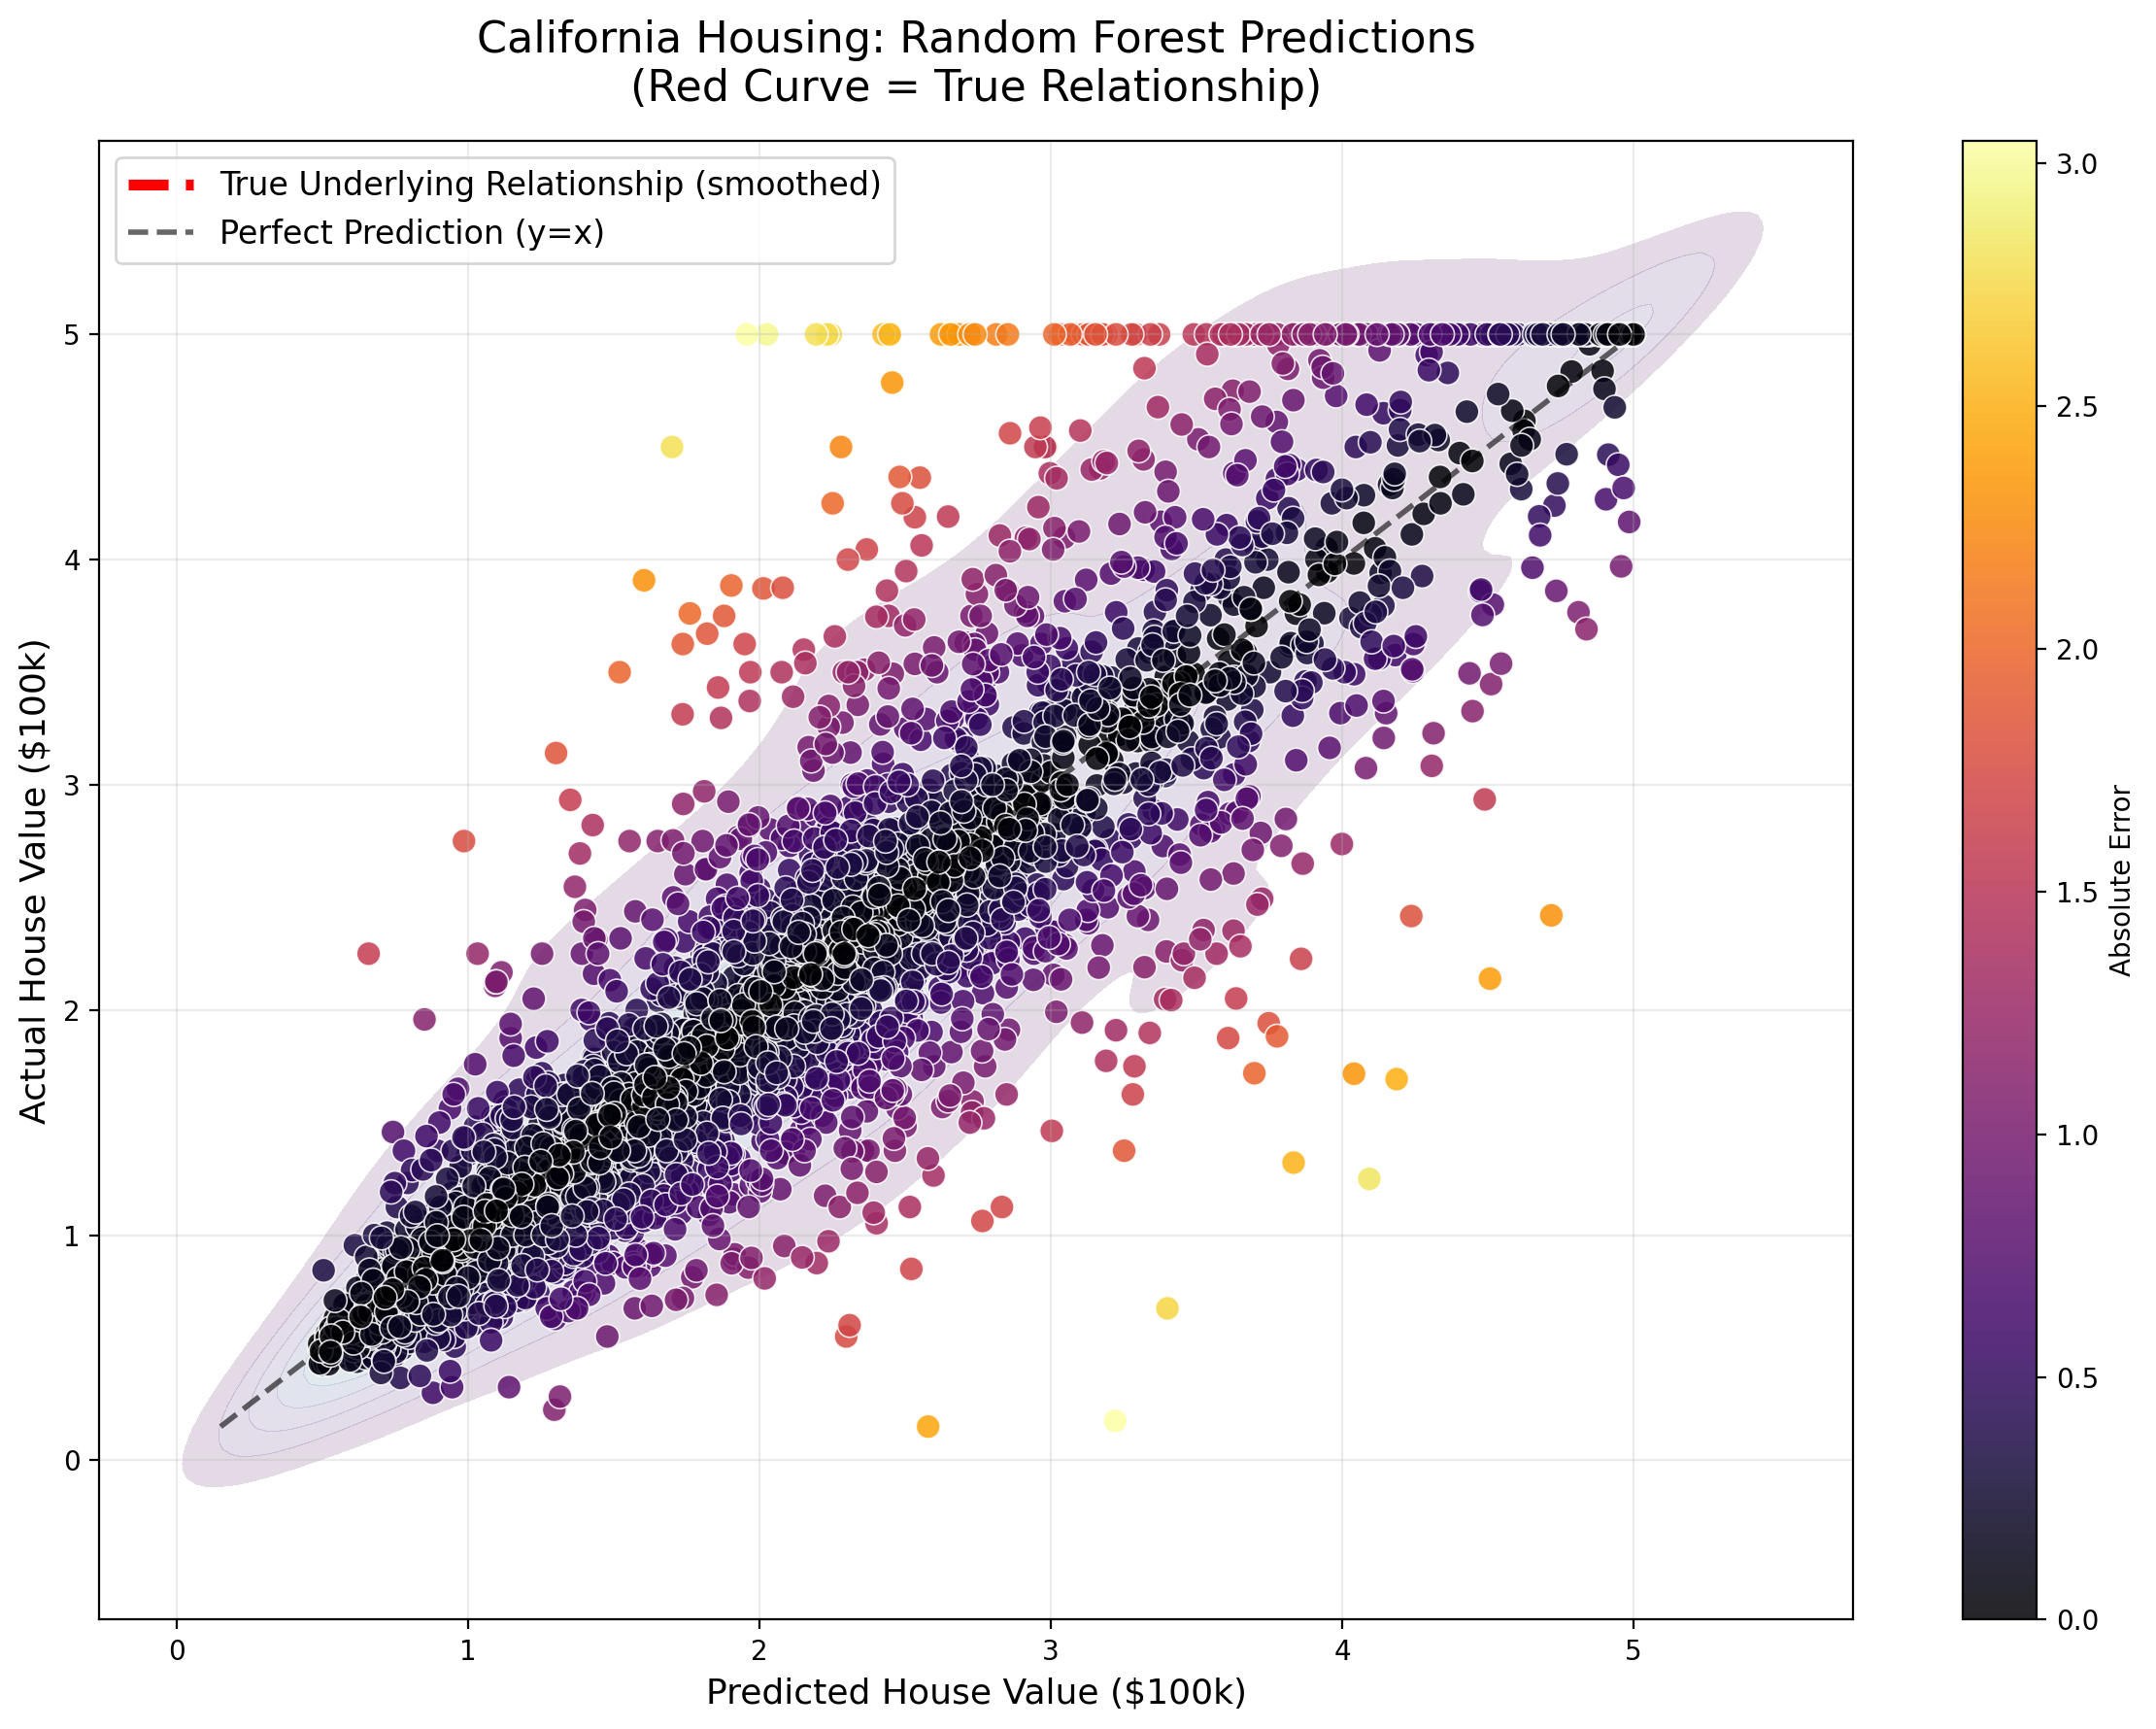

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.interpolate import make_interp_spline
from scipy.interpolate import UnivariateSpline
plt.figure(figsize=(12, 9), dpi=200)

sns.kdeplot(x=y_pred_for_pic, y=y_test_for_pic, fill=True, cmap='viridis', alpha=0.15)

plt.scatter(y_pred_for_pic, y_test_for_pic, c=np.abs(y_test_for_pic - y_pred_for_pic), cmap='inferno', 
            s=80, alpha=0.85, edgecolors='white', linewidth=0.6)
sort_idx = np.argsort(y_pred_for_pic)
x_sorted = y_pred_for_pic[sort_idx]
y_sorted = y_test_for_pic[sort_idx]

spl = UnivariateSpline(x_sorted, y_sorted, s=0.5, k=3)  

x_smooth = np.linspace(x_sorted.min(), x_sorted.max(), 400)
y_smooth = spl(x_smooth)

plt.plot(x_smooth, y_smooth, color='red', lw=4, linestyle='--', 
         label='True Underlying Relationship (smoothed)')

plt.plot([y_test_for_pic.min(), y_test_for_pic.max()], [y_test_for_pic.min(), y_test_for_pic.max()], 
         'k--', lw=2, alpha=0.6, label='Perfect Prediction (y=x)')
plt.colorbar(label='Absolute Error')
plt.xlabel('Predicted House Value ($100k)', fontsize=13)
plt.ylabel('Actual House Value ($100k)', fontsize=13)
plt.title('California Housing: Random Forest Predictions\n(Red Curve = True Relationship)', 
          fontsize=16, pad=15)
plt.legend(fontsize=12, loc='upper left', frameon=True)
plt.grid(True, alpha=0.25)
plt.tight_layout()

plt.savefig('rf_actual_vs_pred_glow.png', dpi=400, bbox_inches='tight')
plt.show()


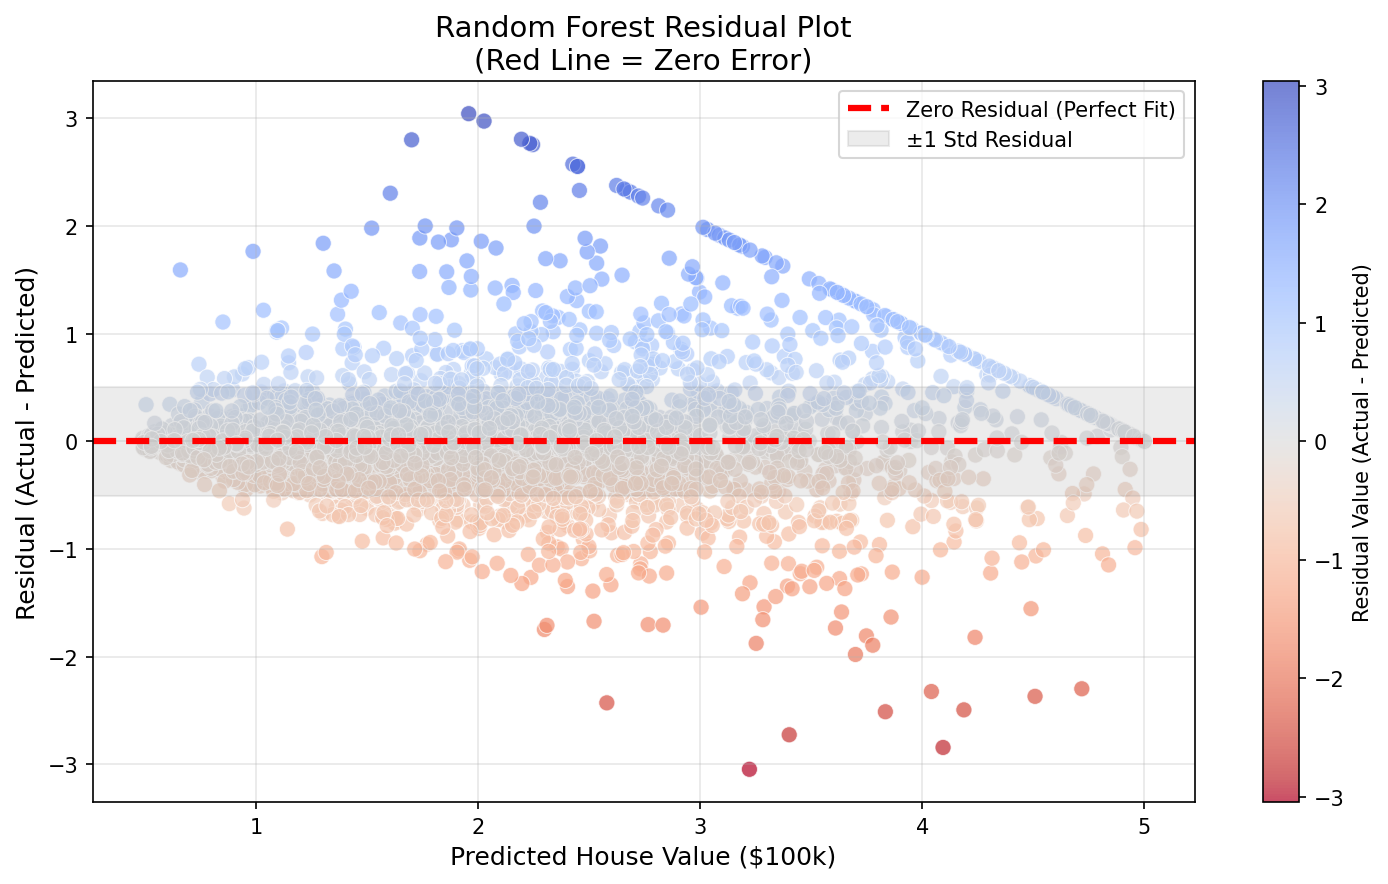

In [ ]:
residuals = y_test_for_pic - y_pred_for_pic
plt.figure(figsize=(10, 6), dpi=150)
plt.scatter(y_pred_for_pic, residuals, c=residuals, cmap='coolwarm_r', 
            alpha=0.7, edgecolors='white', linewidth=0.5, s=60)
plt.axhline(y=0, color='red', linestyle='--', linewidth=3, label='Zero Residual (Perfect Fit)')
std_res = np.std(residuals)
plt.axhspan(-std_res, std_res, color='gray', alpha=0.15, label='±1 Std Residual')
plt.colorbar(label='Residual Value (Actual - Predicted)')
plt.xlabel('Predicted House Value ($100k)', fontsize=12)
plt.ylabel('Residual (Actual - Predicted)', fontsize=12)
plt.title('Random Forest Residual Plot\n(Red Line = Zero Error)', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('rf_residual_plot.png', dpi=300, bbox_inches='tight')
plt.show()

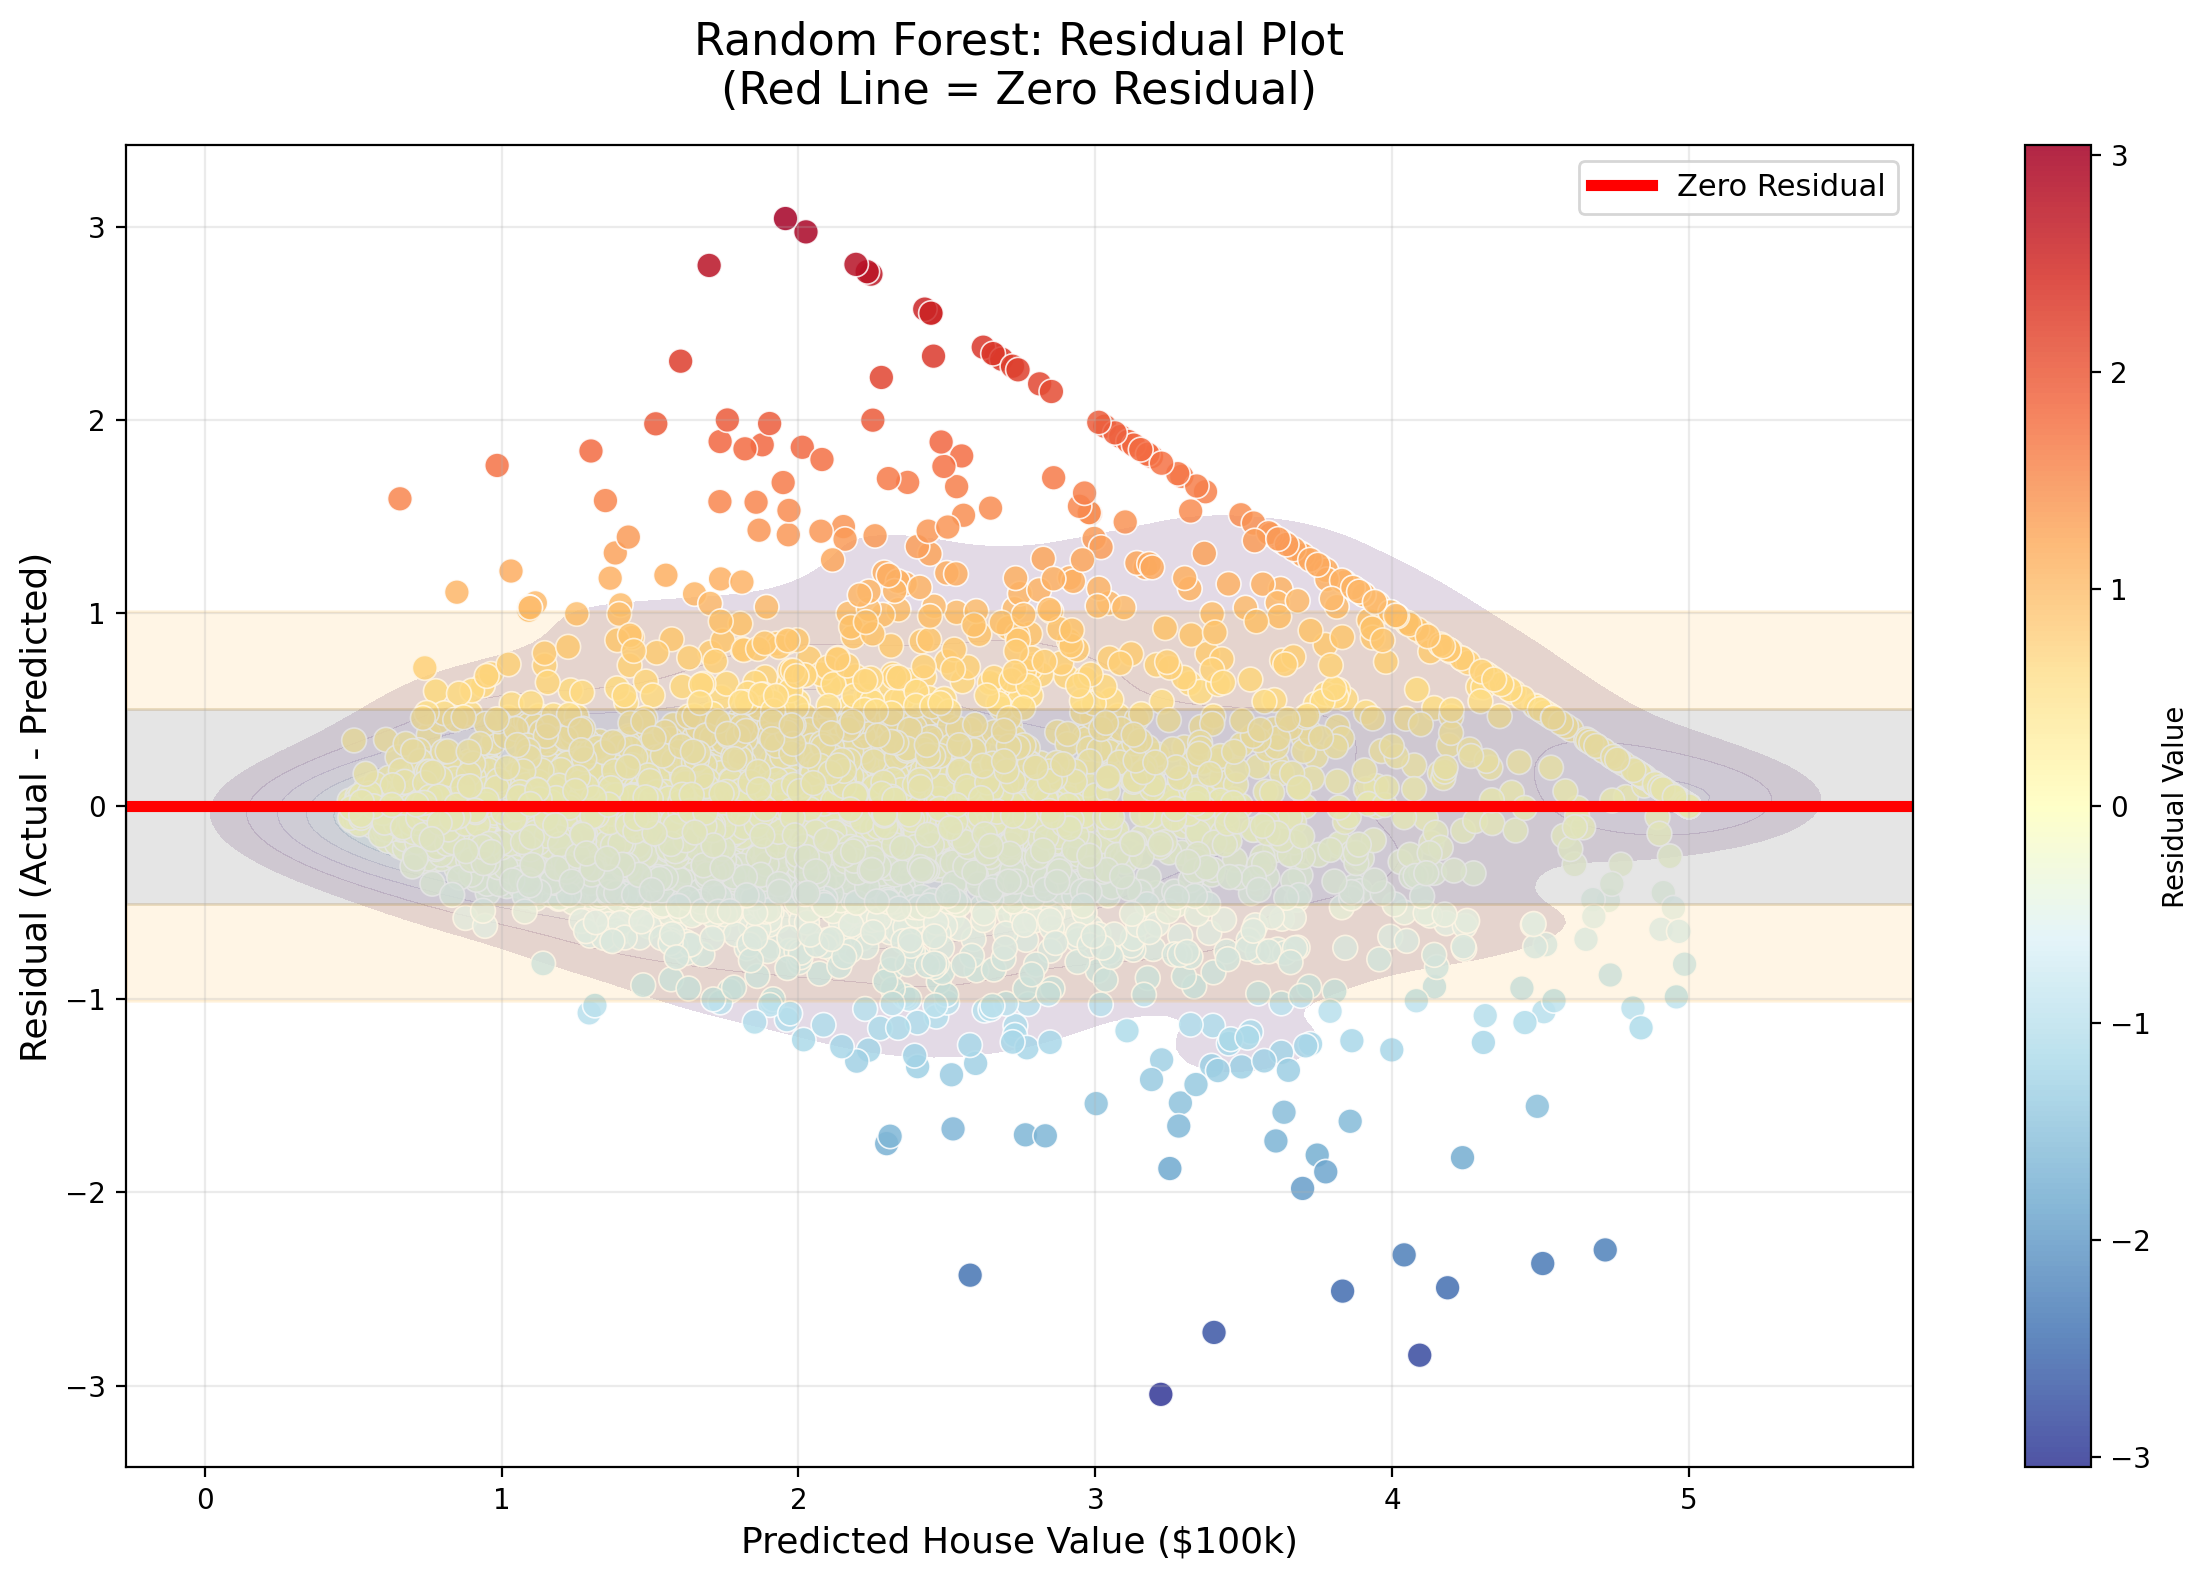

In [ ]:
plt.figure(figsize=(12, 8), dpi=200)
sns.kdeplot(x=y_pred_for_pic, y=residuals, fill=True, cmap='viridis', alpha=0.15)
plt.scatter(y_pred_for_pic, residuals, c=residuals, cmap='RdYlBu_r', 
            s=80, alpha=0.85, edgecolors='white', linewidth=0.6)
plt.axhline(0, color='red', linestyle='-', linewidth=4, label='Zero Residual')
std_res = np.std(residuals)
plt.axhspan(-std_res, std_res, color='gray', alpha=0.2)
plt.axhspan(-2*std_res, -std_res, color='orange', alpha=0.1)
plt.axhspan(std_res, 2*std_res, color='orange', alpha=0.1)
plt.colorbar(label='Residual Value')
plt.xlabel('Predicted House Value ($100k)', fontsize=13)
plt.ylabel('Residual (Actual - Predicted)', fontsize=13)
plt.title('Random Forest: Residual Plot\n(Red Line = Zero Residual)', fontsize=16, pad=15)
plt.legend(loc='upper right', fontsize=11, frameon=True)
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.savefig('rf_residual_plot_glow.png', dpi=400, bbox_inches='tight')
plt.show()

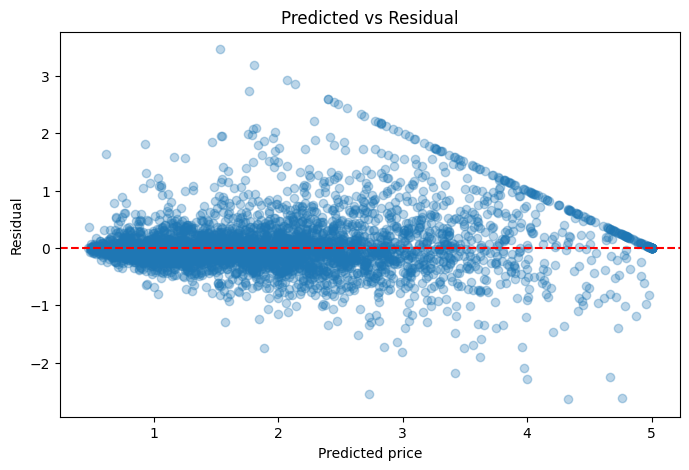

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(error_df['Predicted_Price'], error_df['Residual'],alpha=0.3)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Predicted price')
plt.ylabel('Residual')
plt.title("Predicted vs Residual")
plt.show() 

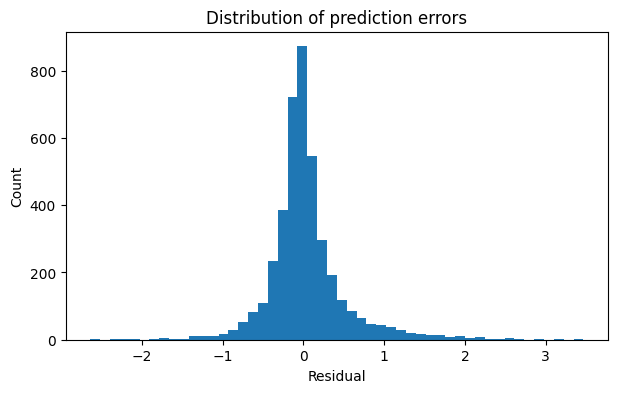

In [65]:
plt.figure(figsize=(7,4 ))
plt.hist(error_df['Residual'],bins=50)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Distribution of prediction errors')
plt.show()